# Exploring learning rates

Creation date: 2021-02-08

Initial authors: Axel Nyström

Commit to use: __d36738a269b22a4d06f82d948a281712ecfc7593__ in repository __git@github.com:Tipulidae/mim.git__


## Summary
I analyse the results of a set of 39 experiments with randomly chosen values for learning rate, batch size and dropout. 

## Purpose
I want a better understanding of how learning rate, batch size and dropout affect the training and validation of a basic CNN on the ECG data. After advice from Mattias Ohlsson, I will primarily look at the loss function rather than AUC, accuracy or other metrics. 

## Method
I defined a very simple 2-layer CNN and performed a random search over batch-size, learning rates and dropout, letting each experiment run for 200 epochs. During the weekend a total of 39 experiments finished, the results of which I analyze in this notebook. The data used was ESC-Trop, predicting MACE within 30 days using the median beat of a single ECG record.

## Imports 

In [1]:
import sys
sys.path.append('..')

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#this is only for not seeing any warnings in the pdf
import warnings
warnings.filterwarnings('ignore')

from mim.presenter import Presenter
from mim.experiments.hyper_experiments import HyperSearch

# Analysis

## Overview
A brief overview of all the experiments

In [3]:
HyperSearch.LearningRates.template.asdict()

{'description': 'Experiment using very simple cnn, testing different learning rates, batch sizes and dropout rates.',
 'extractor': 'mim.extractors.esc_trop.EscTrop',
 'index': {},
 'features': {'ecg_mode': 'beat', 'ecgs': ['index']},
 'labels': None,
 'post_processing': None,
 'model': 'mim.models.simple_nn.super_basic_cnn',
 'model_kwargs': {'dropout': Choice([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])},
 'building_model_requires_development_data': True,
 'optimizer': {'name': 'tensorflow.python.keras.optimizer_v2.adam.Adam',
  'kwargs': {'learning_rate': Choice([0.003, 0.001, 0.0003, 0.0001, 3e-05])}},
 'loss': 'binary_crossentropy',
 'epochs': 200,
 'initial_epoch': 0,
 'batch_size': Choice([8, 16, 32, 64, 128]),
 'metrics': ['accuracy', 'auc'],
 'ignore_callbacks': False,
 'skip_compile': False,
 'random_state': Int(0, 1000000000),
 'cv': 'mim.cross_validation.ChronologicalSplit',
 'cv_kwargs': {'test_size': 0.333},
 'scoring': 'sklearn.metrics._ranking.roc_auc_score',
 'h

In [4]:
HyperSearch.LearningRates.template.batch_size

Choice([8, 16, 32, 64, 128])

In [5]:
HyperSearch.LearningRates.template.optimizer['kwargs']['learning_rate']

Choice([0.003, 0.001, 0.0003, 0.0001, 3e-05])

In [6]:
HyperSearch.LearningRates.template.model_kwargs['dropout']

Choice([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [7]:
p = Presenter('HyperSearch/LearningRates')

2021-02-11 11:07:59 - Presenter - INFO - Loading xp_0
2021-02-11 11:07:59 - Presenter - INFO - Loading xp_1
2021-02-11 11:07:59 - Presenter - INFO - Loading xp_10
2021-02-11 11:07:59 - Presenter - INFO - Loading xp_11
2021-02-11 11:07:59 - Presenter - INFO - Loading xp_12
2021-02-11 11:07:59 - Presenter - INFO - Loading xp_13
2021-02-11 11:07:59 - Presenter - INFO - Loading xp_14
2021-02-11 11:07:59 - Presenter - INFO - Loading xp_15
2021-02-11 11:07:59 - Presenter - INFO - Loading xp_16
2021-02-11 11:07:59 - Presenter - INFO - Loading xp_17
2021-02-11 11:07:59 - Presenter - INFO - Loading xp_18
2021-02-11 11:07:59 - Presenter - INFO - Loading xp_19
2021-02-11 11:07:59 - Presenter - INFO - Loading xp_2
2021-02-11 11:07:59 - Presenter - INFO - Loading xp_20
2021-02-11 11:07:59 - Presenter - INFO - Loading xp_21
2021-02-11 11:07:59 - Presenter - INFO - Loading xp_22
2021-02-11 11:07:59 - Presenter - INFO - Loading xp_23
2021-02-11 11:07:59 - Presenter - INFO - Loading xp_24
2021-02-11 11

In [8]:
p.describe()

,test_score,test_score_std,train_score,commit,changed,timestamp
xp_0,0.768655,0.0,0.800399,84b161d7,False,2021-02-05 19:21:54.801111
xp_1,0.759694,0.0,0.787739,84b161d7,False,2021-02-05 21:25:51.490257
xp_10,0.766483,0.0,0.793657,84b161d7,False,2021-02-06 12:36:29.328607
xp_11,0.729649,0.0,0.749998,84b161d7,False,2021-02-06 14:16:01.302382
xp_12,0.763637,0.0,0.789112,84b161d7,False,2021-02-06 16:06:58.538605
xp_13,0.746453,0.0,0.773769,84b161d7,False,2021-02-06 17:24:02.100191
xp_14,0.742691,0.0,0.767664,84b161d7,False,2021-02-06 18:52:16.594973
xp_15,0.764110,0.0,0.790156,84b161d7,False,2021-02-06 20:10:21.027729
xp_16,0.756605,0.0,0.783945,84b161d7,False,2021-02-06 21:27:34.646099
xp_17,0.771905,0.0,0.798379,84b161d7,False,2021-02-06 22:43:49.749820


In [9]:
s = p.summary()
s = s.rename(
    columns={
        'optimizer_kwargs_learning_rate': 'lr', 
        'model_kwargs_dropout': 'dropout'
    }
)[['lr', 'dropout', 'batch_size', 'auc']]
display(s)

,lr,dropout,batch_size,auc
xp_0,0.0003,0.0,8,0.768655
xp_1,0.0003,0.6,8,0.759694
xp_10,0.00003,0.6,64,0.766483
xp_11,0.003,0.7,32,0.729649
xp_12,0.0001,0.8,16,0.763637
xp_13,0.00003,0.9,128,0.746453
xp_14,0.003,0.5,64,0.742691
xp_15,0.0001,0.8,128,0.764110
xp_16,0.0001,0.9,128,0.756605
xp_17,0.0003,0.6,128,0.771905


In [10]:
s.sort_values(by='auc')

,lr,dropout,batch_size,auc
xp_25,0.003,0.8,32,0.701771
xp_31,0.003,0.6,8,0.703409
xp_28,0.003,0.7,8,0.710044
xp_8,0.003,0.7,8,0.712660
xp_11,0.003,0.7,32,0.729649
xp_22,0.003,0.5,16,0.731934
xp_7,0.003,0.1,32,0.734641
xp_6,0.003,0.6,128,0.739381
xp_29,0.001,0.7,8,0.742243
xp_14,0.003,0.5,64,0.742691


In [11]:
s.join(p.times()).sort_values(by='time')

,lr,dropout,batch_size,auc,time
xp_6,0.003,0.6,128,0.739381,4504.524098
xp_4,0.0003,0.2,128,0.776788,4511.205420
xp_17,0.0003,0.6,128,0.771905,4538.003476
xp_13,0.00003,0.9,128,0.746453,4585.916475
xp_16,0.0001,0.9,128,0.756605,4596.166659
xp_2,0.0001,0.0,128,0.774223,4598.261311
xp_21,0.0001,0.7,128,0.768426,4608.073137
xp_15,0.0001,0.8,128,0.764110,4647.143934
xp_24,0.001,0.5,64,0.761063,5241.576880
xp_14,0.003,0.5,64,0.742691,5257.121367


Interestingly, smaller batch sizes has a really negative impact on training times. I will investigate this further (although not right now) and see if it might be linked to streaming data from disk rather than storing it in memory. 

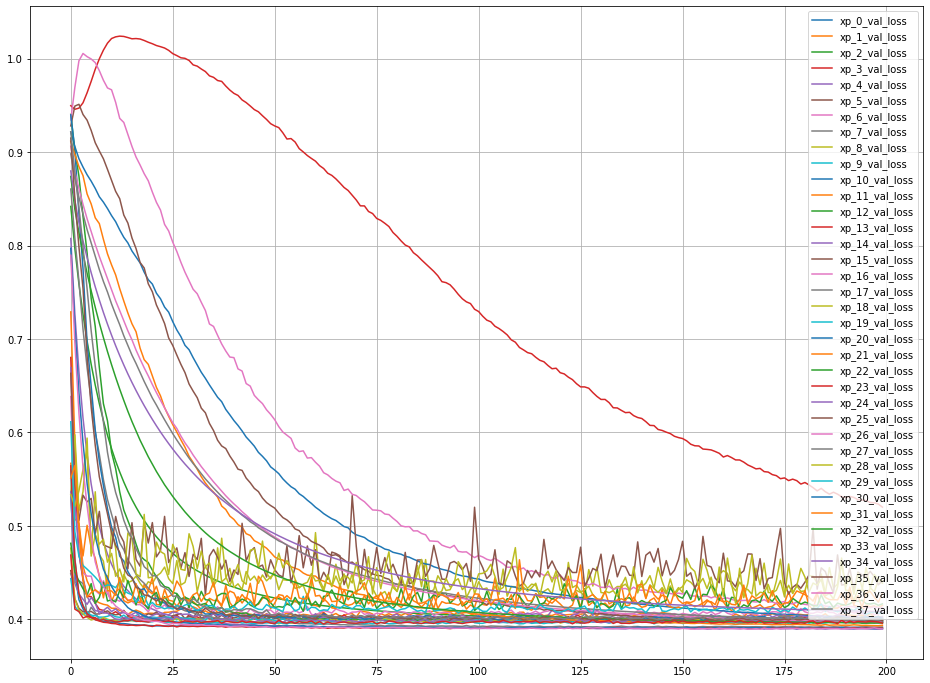

In [12]:
p.plot_history([f'xp_{i}' for i in range(38)], columns=['val_loss'], figsize=(16, 12), grid=True)

## Classifying the results
The loss curves appear to fall into different "categories", so I looked through each one and labelled it roughly as being either "fine", "slow", "kinda choppy" or "very choppy". Maybe that will help with finding interesting patterns.

In [13]:
kinda_choppy = [f'xp_{i}' for i in [1, 3, 5, 6, 7, 9, 14, 18, 29]]
very_choppy = [f'xp_{i}' for i in [8, 11, 22, 25, 28, 31]]
slow = [f'xp_{i}' for i in [2, 10, 13, 15, 16, 21, 26, 27, 32, 34]]
fine = [f'xp_{i}' for i in [0, 4, 12, 17, 19, 20, 23, 24, 30, 33, 35, 36, 37]]

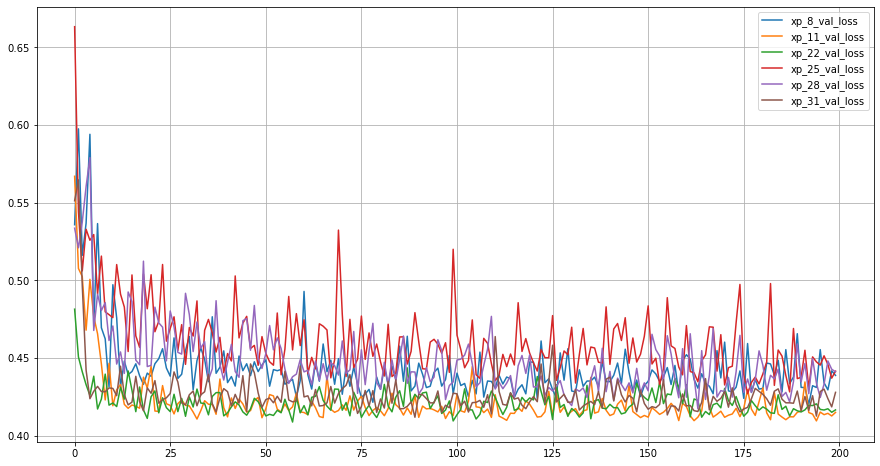

In [14]:
p.plot_history(very_choppy, columns=['val_loss'], figsize=(15, 8), grid=True)

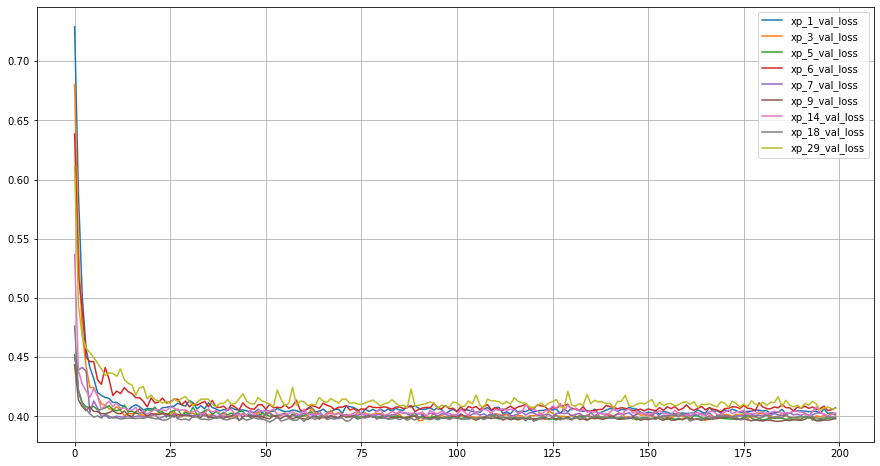

In [15]:
p.plot_history(kinda_choppy, columns=['val_loss'], figsize=(15, 8), grid=True)

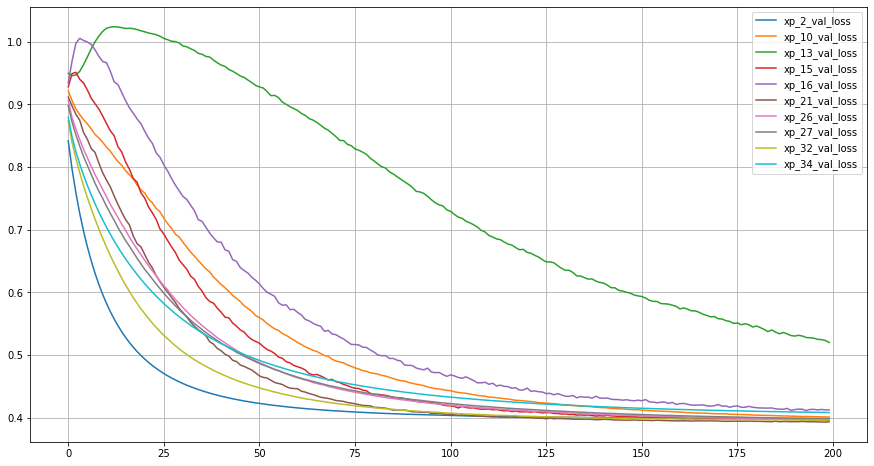

In [16]:
p.plot_history(slow, columns=['val_loss'], figsize=(15, 8), grid=True)

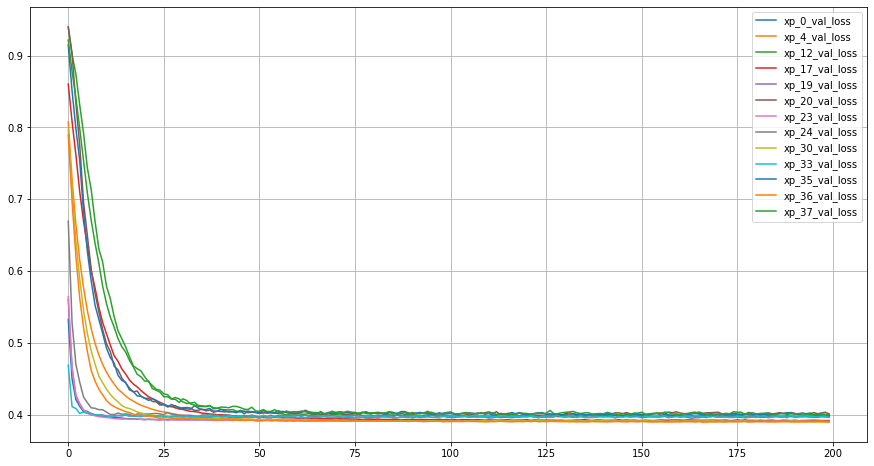

In [17]:
p.plot_history(fine, columns=['val_loss'], figsize=(15, 8), grid=True)

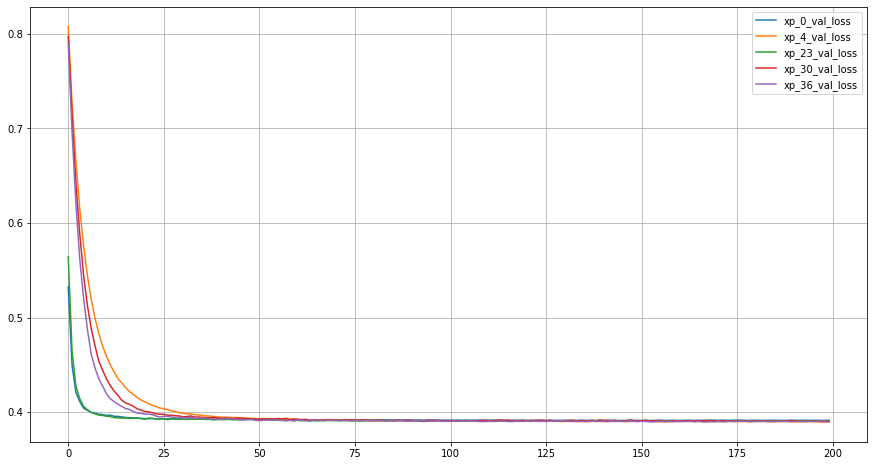

In [18]:
best = ['xp_0', 'xp_4', 'xp_23', 'xp_30', 'xp_36']
p.plot_history(best, columns=['val_loss'], figsize=(15, 8), grid=True)

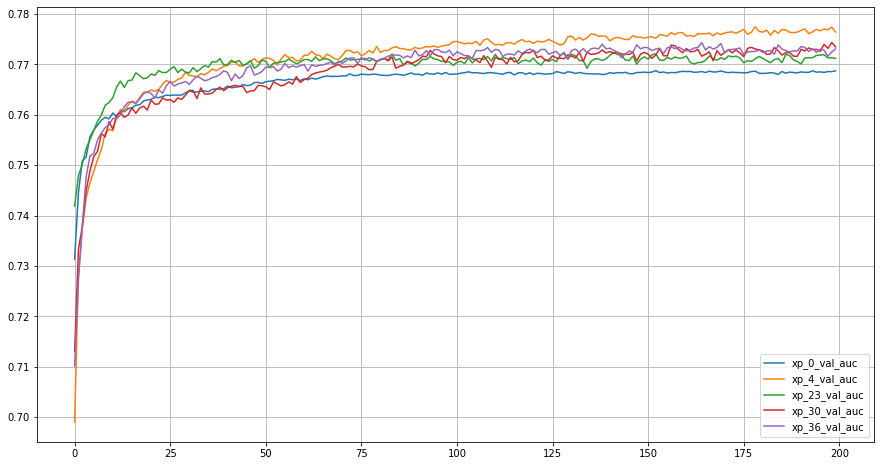

In [19]:
p.plot_history(best, columns=['val_auc'], figsize=(15, 8), grid=True)

In [20]:
s.loc[very_choppy, :]

,lr,dropout,batch_size,auc
xp_8,0.003,0.7,8,0.712660
xp_11,0.003,0.7,32,0.729649
xp_22,0.003,0.5,16,0.731934
xp_25,0.003,0.8,32,0.701771
xp_28,0.003,0.7,8,0.710044
xp_31,0.003,0.6,8,0.703409


In [21]:
s.loc[kinda_choppy, :]

,lr,dropout,batch_size,auc
xp_1,0.0003,0.6,8,0.759694
xp_3,0.0003,0.5,8,0.760887
xp_5,0.001,0.3,8,0.745460
xp_6,0.003,0.6,128,0.739381
xp_7,0.003,0.1,32,0.734641
xp_9,0.001,0.2,8,0.748868
xp_14,0.003,0.5,64,0.742691
xp_18,0.003,0.2,64,0.743901
xp_29,0.001,0.7,8,0.742243


In [22]:
s.loc[slow, :]

,lr,dropout,batch_size,auc
xp_2,0.0001,0.0,128,0.774223
xp_10,0.00003,0.6,64,0.766483
xp_13,0.00003,0.9,128,0.746453
xp_15,0.0001,0.8,128,0.764110
xp_16,0.0001,0.9,128,0.756605
xp_21,0.0001,0.7,128,0.768426
xp_26,0.00003,0.3,64,0.770247
xp_27,0.00003,0.2,64,0.772720
xp_32,0.00003,0.1,32,0.775215
xp_34,0.00003,0.0,64,0.770634


In [23]:
s.loc[fine, :]

,lr,dropout,batch_size,auc
xp_0,0.0003,0.0,8,0.768655
xp_4,0.0003,0.2,128,0.776788
xp_12,0.0001,0.8,16,0.763637
xp_17,0.0003,0.6,128,0.771905
xp_19,0.001,0.4,32,0.758376
xp_20,0.0001,0.8,8,0.760923
xp_23,0.0003,0.1,8,0.771300
xp_24,0.001,0.5,64,0.761063
xp_30,0.0003,0.5,64,0.773167
xp_33,0.003,0.1,64,0.759573


In [24]:
s.loc[best, :]

,lr,dropout,batch_size,auc
xp_0,0.0003,0.0,8,0.768655
xp_4,0.0003,0.2,128,0.776788
xp_23,0.0003,0.1,8,0.771300
xp_30,0.0003,0.5,64,0.773167
xp_36,0.0001,0.4,8,0.772954


## Analyzing dropouts
I compare different values of dropout for various fixed slices of learning rate and batch-size. In general, it looks like a lower dropout gives a smoother and faster loss curve, at the cost of not always reaching the same final loss levels. 

In [25]:
temp = s.lr.astype(str) + s.batch_size.astype(str)
temp.name = 'temp'
dropouts = []
for _, df in s.join(temp).groupby('temp'):
    if len(dropout := df.sort_values(by='dropout').index.values) > 2:
        print(dropout)
        dropouts.append(dropout)

['xp_2' 'xp_21' 'xp_15' 'xp_16']
['xp_36' 'xp_20' 'xp_35']
['xp_0' 'xp_23' 'xp_3' 'xp_1']
['xp_9' 'xp_5' 'xp_29']
['xp_7' 'xp_11' 'xp_25']
['xp_33' 'xp_18' 'xp_14']
['xp_31' 'xp_28' 'xp_8']
['xp_34' 'xp_27' 'xp_26' 'xp_10']


,lr,dropout,batch_size,auc
xp_2,0.0001,0.0,128,0.774223
xp_21,0.0001,0.7,128,0.768426
xp_15,0.0001,0.8,128,0.764110
xp_16,0.0001,0.9,128,0.756605


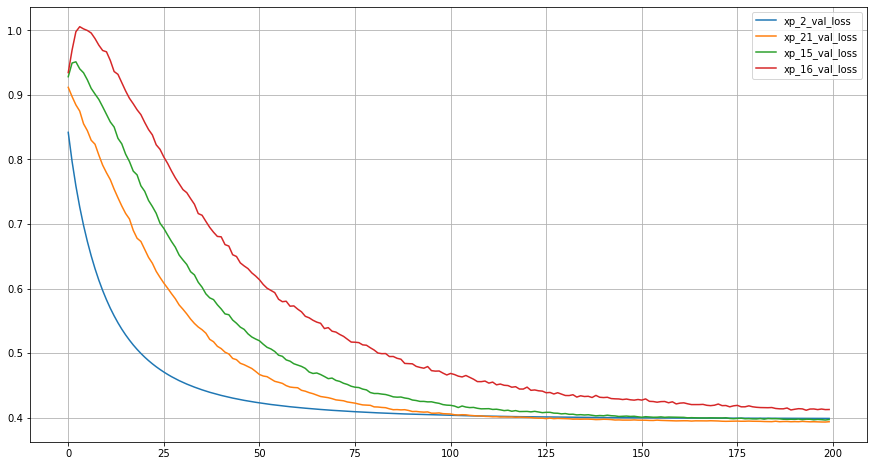

In [26]:
k = 0
display(s.loc[dropouts[k], :])
p.plot_history(dropouts[k], columns=['val_loss'], figsize=(15, 8), grid=True)

,lr,dropout,batch_size,auc
xp_36,0.0001,0.4,8,0.772954
xp_20,0.0001,0.8,8,0.760923
xp_35,0.0001,0.8,8,0.761680


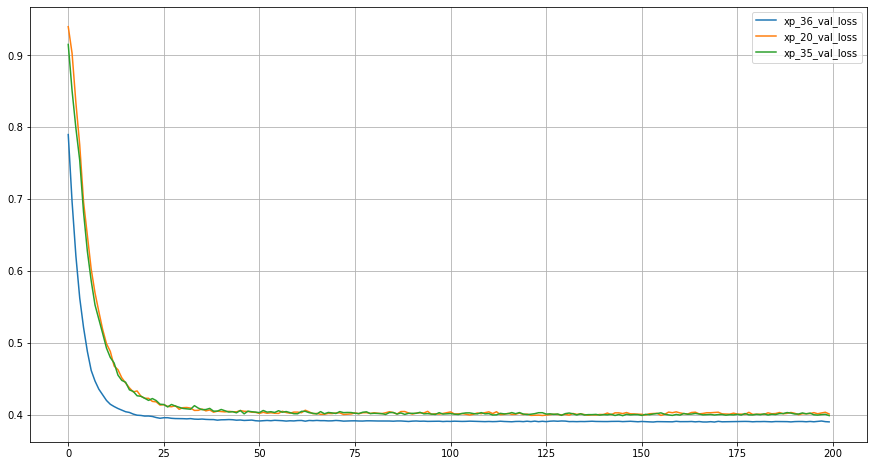

In [27]:
k = 1
display(s.loc[dropouts[k], :])
p.plot_history(dropouts[k], columns=['val_loss'], figsize=(15, 8), grid=True)

,lr,dropout,batch_size,auc
xp_0,0.0003,0.0,8,0.768655
xp_23,0.0003,0.1,8,0.771300
xp_3,0.0003,0.5,8,0.760887
xp_1,0.0003,0.6,8,0.759694


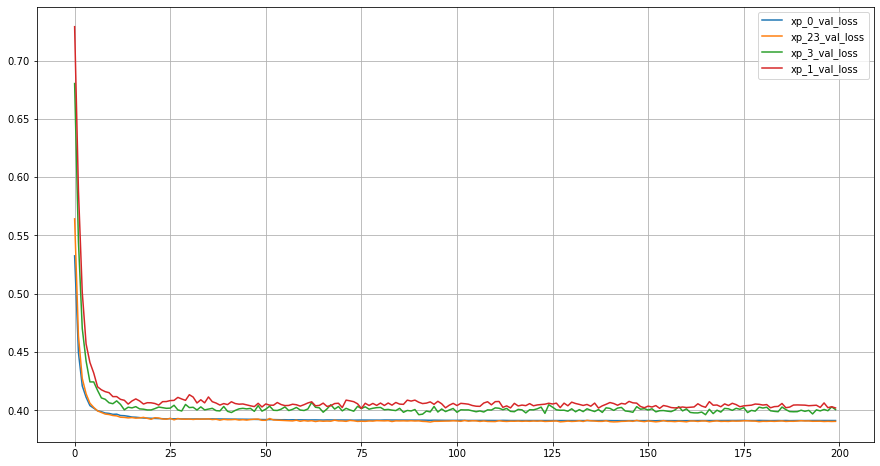

In [28]:
k = 2
display(s.loc[dropouts[k], :])
p.plot_history(dropouts[k], columns=['val_loss'], figsize=(15, 8), grid=True)

,lr,dropout,batch_size,auc
xp_9,0.001,0.2,8,0.748868
xp_5,0.001,0.3,8,0.745460
xp_29,0.001,0.7,8,0.742243


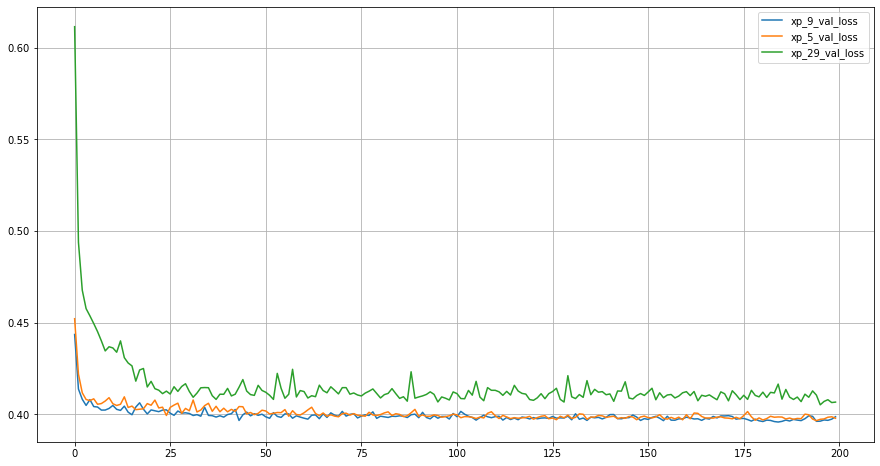

In [29]:
k = 3
display(s.loc[dropouts[k], :])
p.plot_history(dropouts[k], columns=['val_loss'], figsize=(15, 8), grid=True)

,lr,dropout,batch_size,auc
xp_7,0.003,0.1,32,0.734641
xp_11,0.003,0.7,32,0.729649
xp_25,0.003,0.8,32,0.701771


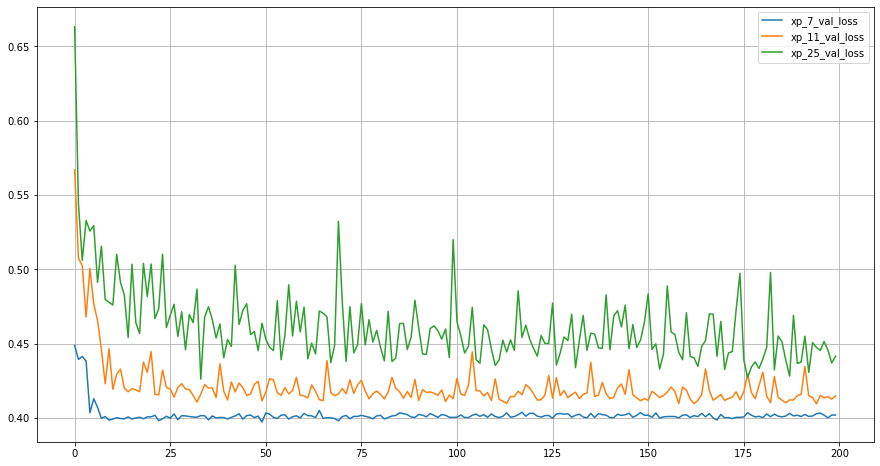

In [30]:
k = 4
display(s.loc[dropouts[k], :])
p.plot_history(dropouts[k], columns=['val_loss'], figsize=(15, 8), grid=True)

,lr,dropout,batch_size,auc
xp_33,0.003,0.1,64,0.759573
xp_18,0.003,0.2,64,0.743901
xp_14,0.003,0.5,64,0.742691


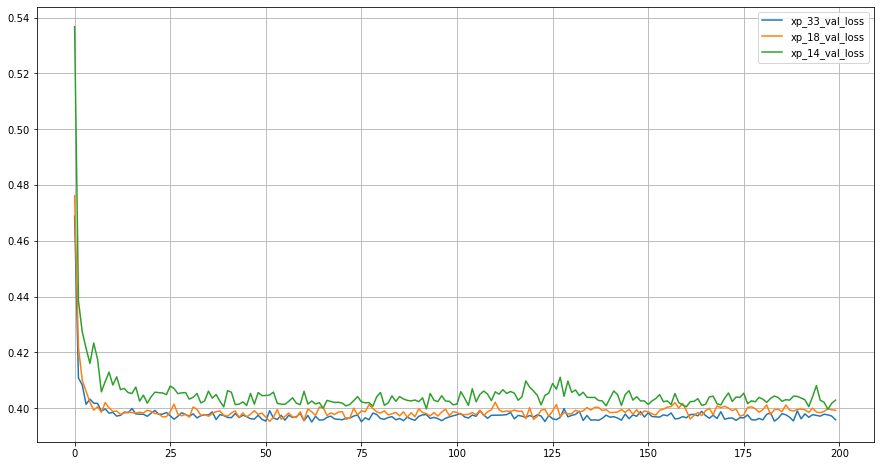

In [31]:
k = 5
display(s.loc[dropouts[k], :])
p.plot_history(dropouts[k], columns=['val_loss'], figsize=(15, 8), grid=True)

,lr,dropout,batch_size,auc
xp_31,0.003,0.6,8,0.703409
xp_28,0.003,0.7,8,0.710044
xp_8,0.003,0.7,8,0.712660


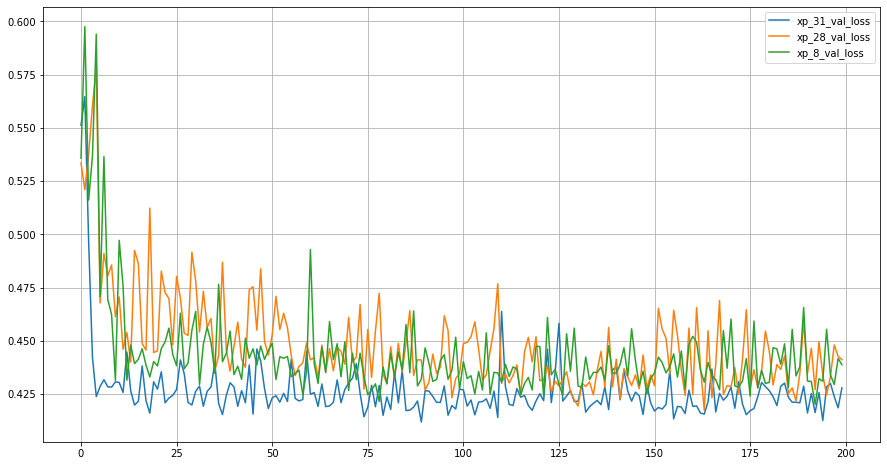

In [32]:
k = 6
display(s.loc[dropouts[k], :])
p.plot_history(dropouts[k], columns=['val_loss'], figsize=(15, 8), grid=True)

,lr,dropout,batch_size,auc
xp_34,0.00003,0.0,64,0.770634
xp_27,0.00003,0.2,64,0.772720
xp_26,0.00003,0.3,64,0.770247
xp_10,0.00003,0.6,64,0.766483


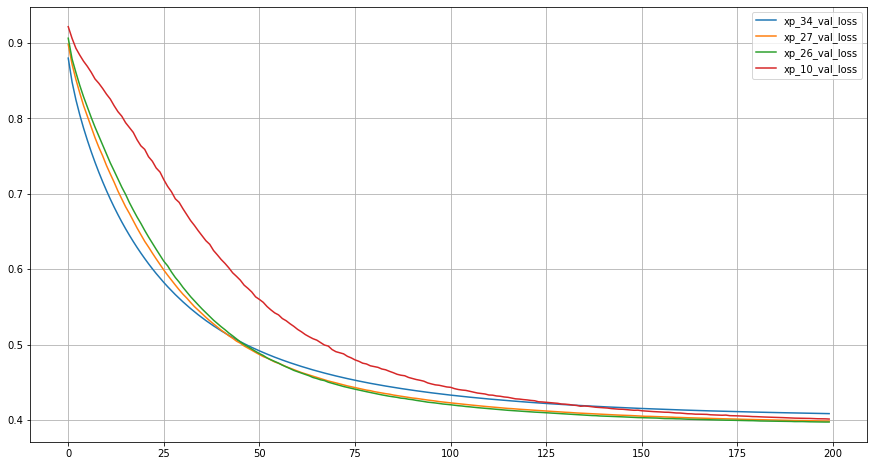

In [33]:
k = 7
display(s.loc[dropouts[k], :])
p.plot_history(dropouts[k], columns=['val_loss'], figsize=(15, 8), grid=True)

## Analyzing batch-size
In the same way as with dropouts, I fixate slices of learning rate and dropout and compare the results from different batch sizes to see if I can find any trends. It seems like a higher batch size has a similar effect as higher dropout, except higher batch sizes makes the loss curve smoother instead of choppier. It seems to slow the convergence slightly, while reducing loss. 

Note that some of the experiments below randomly turned out to be duplicates.

In [34]:
temp = s.lr.astype(str) + s.dropout.astype(str)
temp.name = 'temp'
batch_sizes = []
for _, df in s.join(temp).groupby('temp'):
    if len(batch_size := df.sort_values(by='batch_size').index.values) >= 2:
        print(batch_size)
        batch_sizes.append(batch_size)

['xp_20' 'xp_35' 'xp_12' 'xp_15']
['xp_3' 'xp_30']
['xp_1' 'xp_17']
['xp_7' 'xp_33']
['xp_22' 'xp_14']
['xp_31' 'xp_6']
['xp_28' 'xp_8' 'xp_11']


,lr,dropout,batch_size,auc
xp_20,0.0001,0.8,8,0.760923
xp_35,0.0001,0.8,8,0.761680
xp_12,0.0001,0.8,16,0.763637
xp_15,0.0001,0.8,128,0.764110


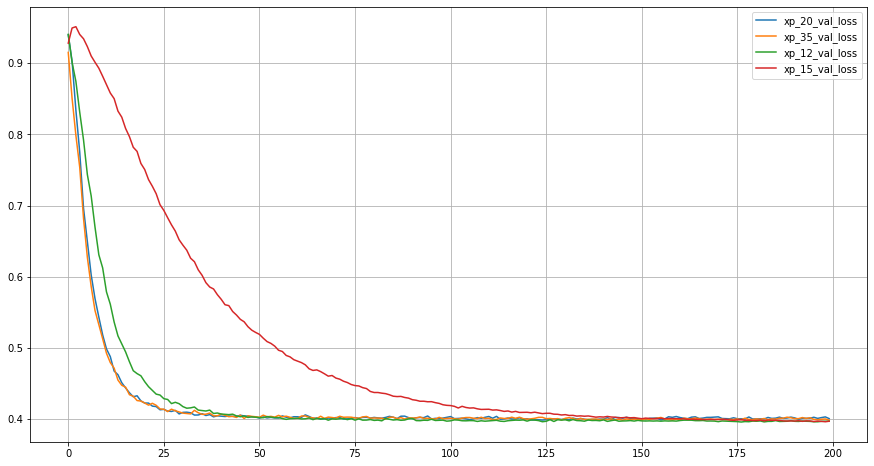

In [35]:
k = 0
display(s.loc[batch_sizes[k], :])
p.plot_history(batch_sizes[k], columns=['val_loss'], figsize=(15, 8), grid=True)

,lr,dropout,batch_size,auc
xp_3,0.0003,0.5,8,0.760887
xp_30,0.0003,0.5,64,0.773167


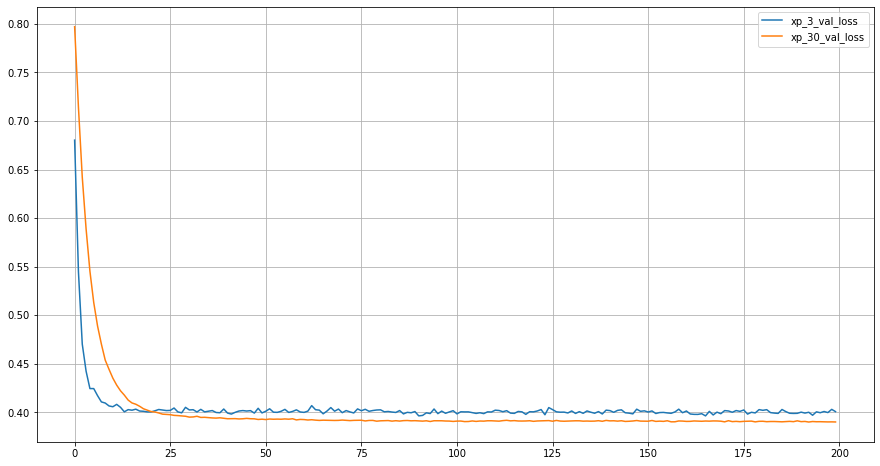

In [36]:
k = 1
display(s.loc[batch_sizes[k], :])
p.plot_history(batch_sizes[k], columns=['val_loss'], figsize=(15, 8), grid=True)

,lr,dropout,batch_size,auc
xp_1,0.0003,0.6,8,0.759694
xp_17,0.0003,0.6,128,0.771905


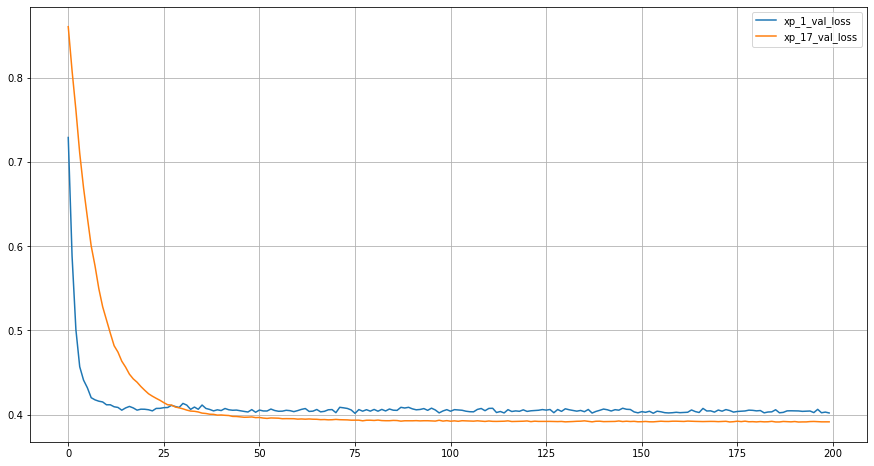

In [37]:
k = 2
display(s.loc[batch_sizes[k], :])
p.plot_history(batch_sizes[k], columns=['val_loss'], figsize=(15, 8), grid=True)

,lr,dropout,batch_size,auc
xp_7,0.003,0.1,32,0.734641
xp_33,0.003,0.1,64,0.759573


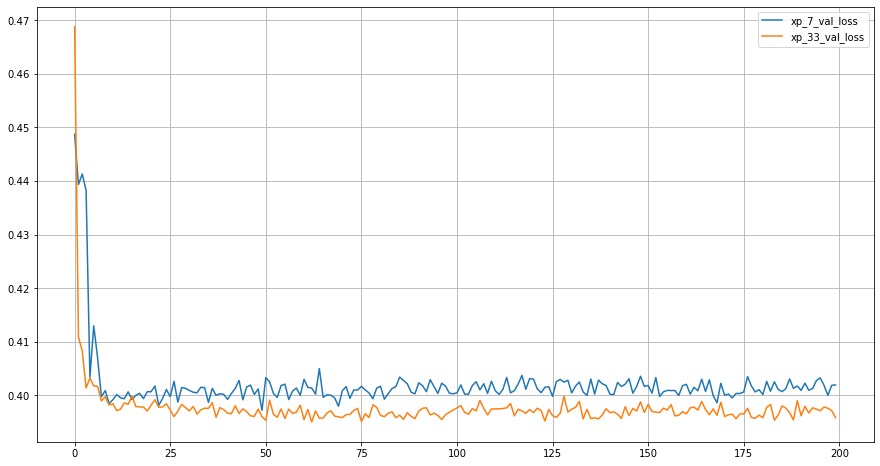

In [38]:
k = 3
display(s.loc[batch_sizes[k], :])
p.plot_history(batch_sizes[k], columns=['val_loss'], figsize=(15, 8), grid=True)

,lr,dropout,batch_size,auc
xp_22,0.003,0.5,16,0.731934
xp_14,0.003,0.5,64,0.742691


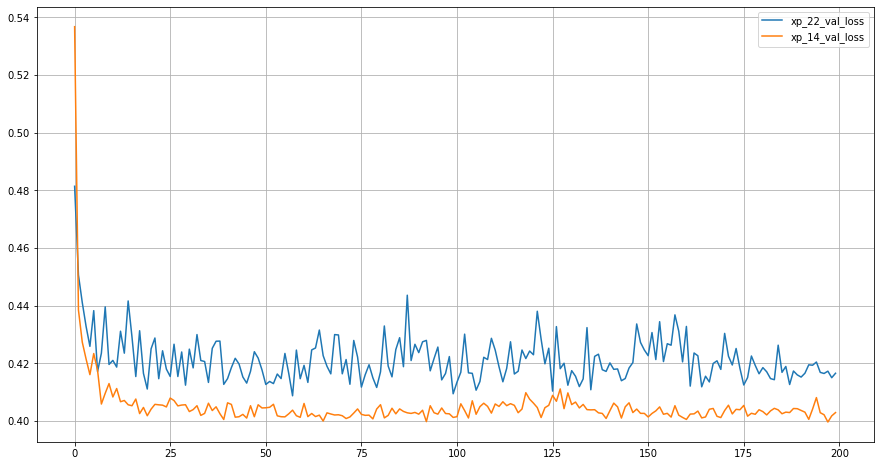

In [39]:
k = 4
display(s.loc[batch_sizes[k], :])
p.plot_history(batch_sizes[k], columns=['val_loss'], figsize=(15, 8), grid=True)

,lr,dropout,batch_size,auc
xp_31,0.003,0.6,8,0.703409
xp_6,0.003,0.6,128,0.739381


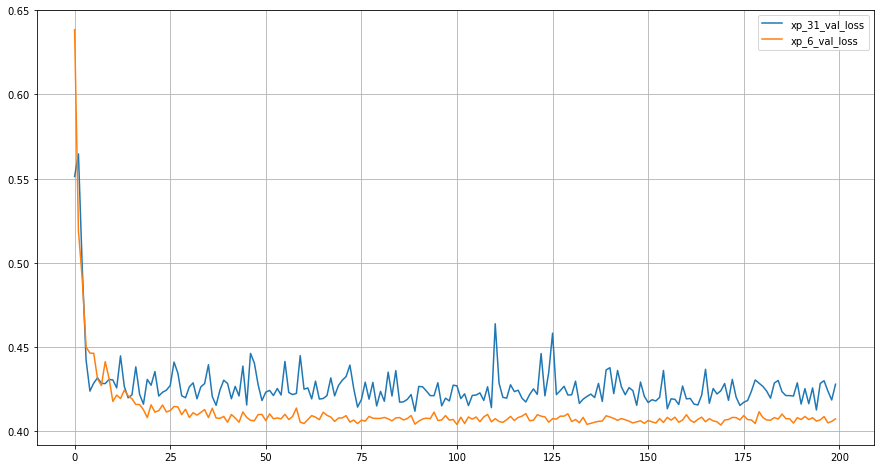

In [40]:
k = 5
display(s.loc[batch_sizes[k], :])
p.plot_history(batch_sizes[k], columns=['val_loss'], figsize=(15, 8), grid=True)

,lr,dropout,batch_size,auc
xp_28,0.003,0.7,8,0.710044
xp_8,0.003,0.7,8,0.712660
xp_11,0.003,0.7,32,0.729649


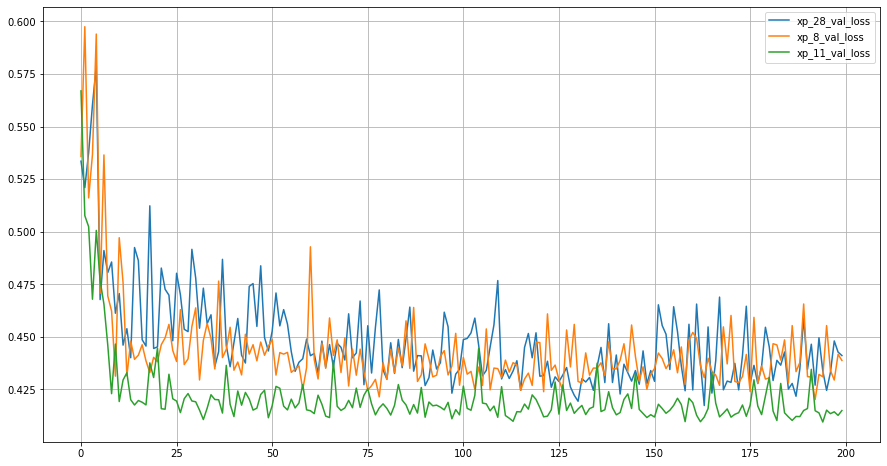

In [41]:
k = 6
display(s.loc[batch_sizes[k], :])
p.plot_history(batch_sizes[k], columns=['val_loss'], figsize=(15, 8), grid=True)

## Analyzing learning-rate
Although the learning-rate is probably the easiest to understand, if nothing else but for completeness, I do the same here as with the other two variables.

In [42]:
temp = s.batch_size.astype(str) + s.dropout.astype(str)
temp.name = 'temp'
lrs = []
for _, df in s.join(temp).groupby('temp'):
    if len(lr := df.sort_values(by='lr').index.values) >= 2:
        print(lr)
        lrs.append(lr)

['xp_17' 'xp_6']
['xp_13' 'xp_16']
['xp_32' 'xp_7']
['xp_27' 'xp_18']
['xp_30' 'xp_24' 'xp_14']
['xp_1' 'xp_31']
['xp_29' 'xp_28' 'xp_8']
['xp_20' 'xp_35']


,lr,dropout,batch_size,auc
xp_17,0.0003,0.6,128,0.771905
xp_6,0.003,0.6,128,0.739381


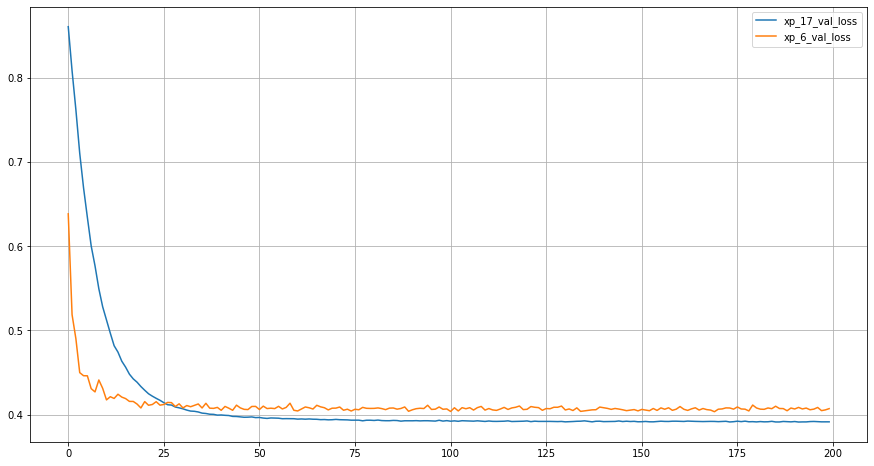

In [43]:
k = 0
display(s.loc[lrs[k], :])
p.plot_history(lrs[k], columns=['val_loss'], figsize=(15, 8), grid=True)

,lr,dropout,batch_size,auc
xp_13,0.00003,0.9,128,0.746453
xp_16,0.0001,0.9,128,0.756605


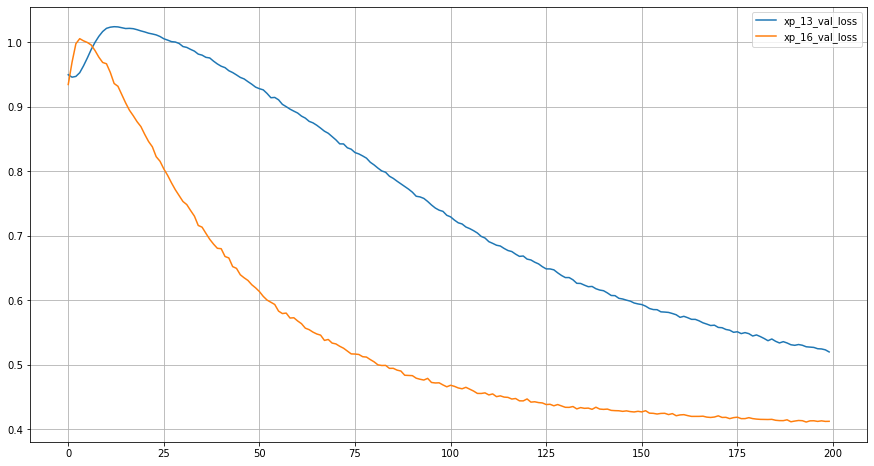

In [44]:
k = 1
display(s.loc[lrs[k], :])
p.plot_history(lrs[k], columns=['val_loss'], figsize=(15, 8), grid=True)

,lr,dropout,batch_size,auc
xp_32,0.00003,0.1,32,0.775215
xp_7,0.003,0.1,32,0.734641


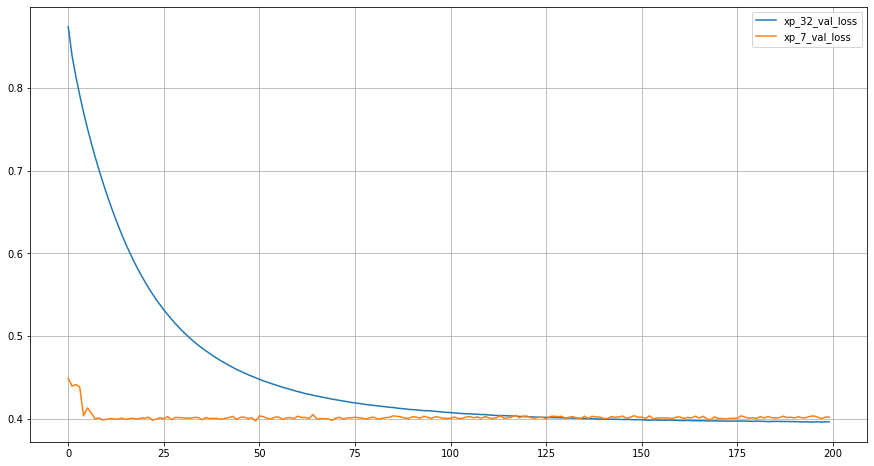

In [45]:
k = 2
display(s.loc[lrs[k], :])
p.plot_history(lrs[k], columns=['val_loss'], figsize=(15, 8), grid=True)

,lr,dropout,batch_size,auc
xp_27,0.00003,0.2,64,0.772720
xp_18,0.003,0.2,64,0.743901


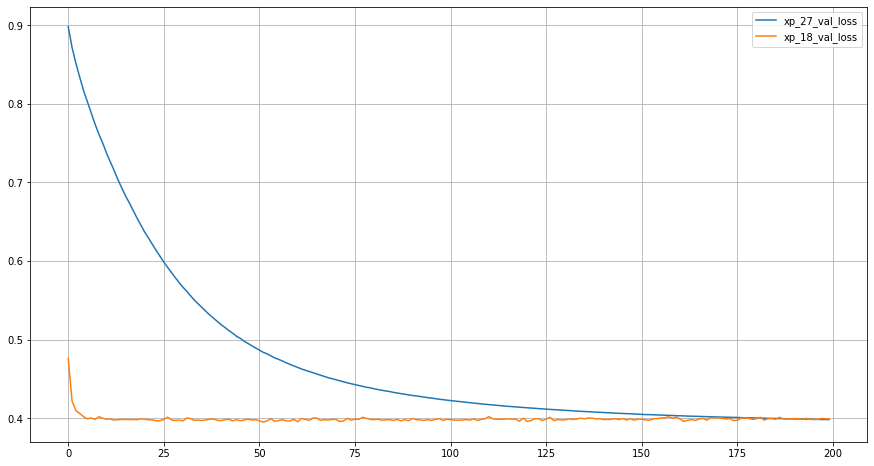

In [46]:
k = 3
display(s.loc[lrs[k], :])
p.plot_history(lrs[k], columns=['val_loss'], figsize=(15, 8), grid=True)

,lr,dropout,batch_size,auc
xp_30,0.0003,0.5,64,0.773167
xp_24,0.001,0.5,64,0.761063
xp_14,0.003,0.5,64,0.742691


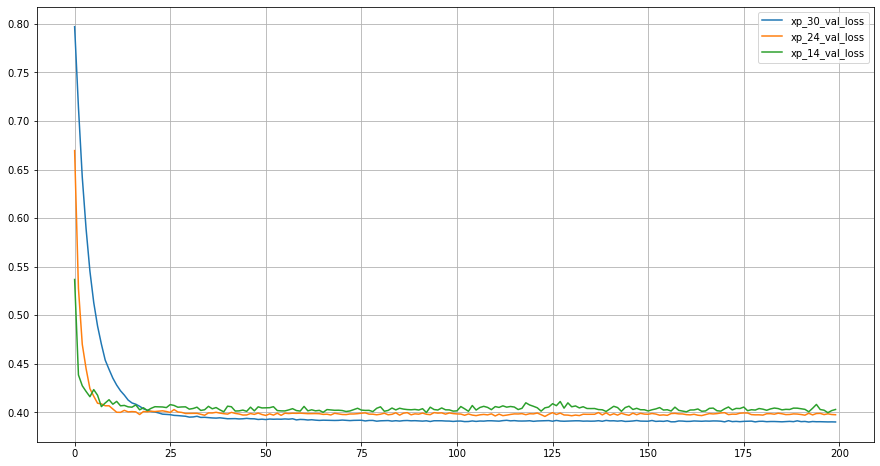

In [47]:
k = 4
display(s.loc[lrs[k], :])
p.plot_history(lrs[k], columns=['val_loss'], figsize=(15, 8), grid=True)

,lr,dropout,batch_size,auc
xp_1,0.0003,0.6,8,0.759694
xp_31,0.003,0.6,8,0.703409


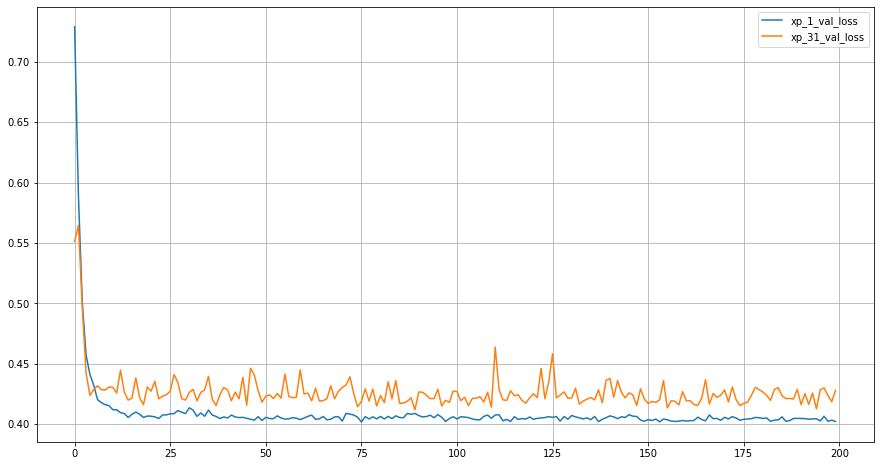

In [48]:
k = 5
display(s.loc[lrs[k], :])
p.plot_history(lrs[k], columns=['val_loss'], figsize=(15, 8), grid=True)

,lr,dropout,batch_size,auc
xp_29,0.001,0.7,8,0.742243
xp_28,0.003,0.7,8,0.710044
xp_8,0.003,0.7,8,0.712660


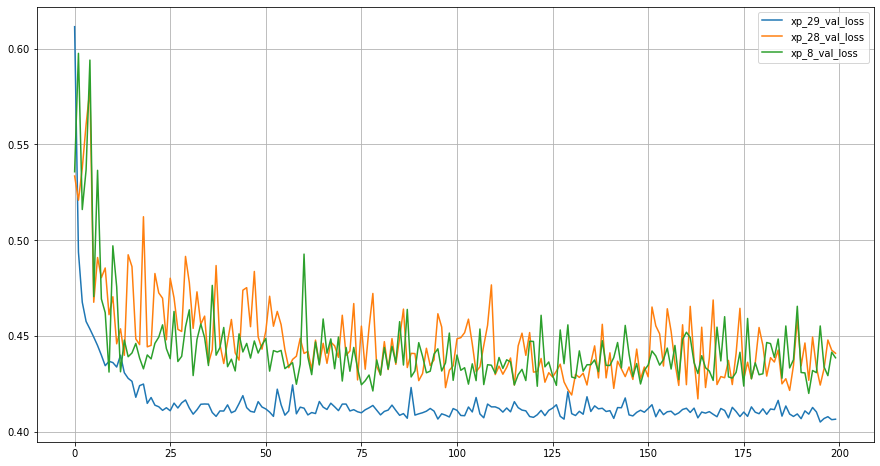

In [49]:
k = 6
display(s.loc[lrs[k], :])
p.plot_history(lrs[k], columns=['val_loss'], figsize=(15, 8), grid=True)

,lr,dropout,batch_size,auc
xp_20,0.0001,0.8,8,0.760923
xp_35,0.0001,0.8,8,0.761680


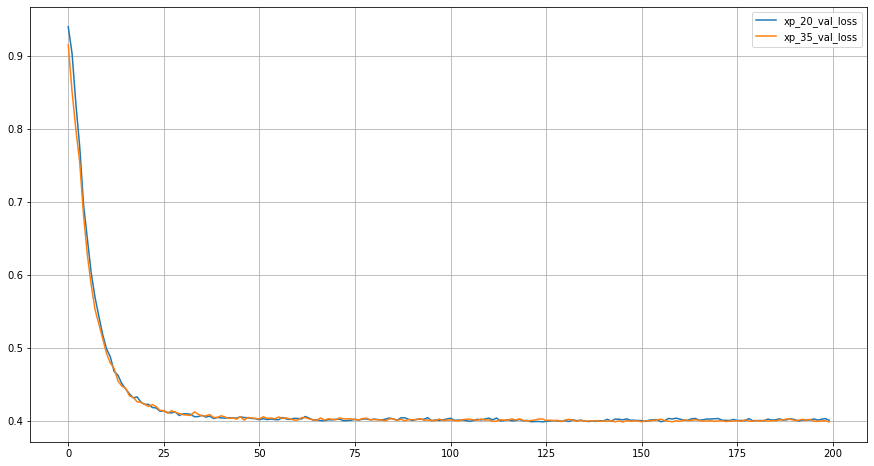

In [50]:
k = 7
display(s.loc[lrs[k], :])
p.plot_history(lrs[k], columns=['val_loss'], figsize=(15, 8), grid=True)

# Conclusions
Generally speaking, from these experiments, I've made the following observations:
* Higher learning rate leads to faster convergence, but also more choppy loss curve. 
* Higher dropout leads to slower convergence and choppier loss curve, but if it's allowed to run for long enough, it seems that higher is better.
* Higher batch size leads to smoother loss curve and potentially better loss, but sometimes also slightly slower convergence. With my current setup it also leads to faster training times, but the reason for this is not completely obvious. 

On this dataset, it seems like with reasonable settings I should be able to stop training after about 50 epochs. I want to set learning rate as high as I can without causing choppy loss curve.

I should probably start by setting batch-size fairly high, like 128 or even 256. Then there's a tradeoff between training time and performance. The higher the dropout, it seems, the better top-performance, but only if the model gets to train for long enough, and the training time increases not only from the increased dropout, but also from forcing the learning rate down. 

Perhaps things look different for more complex models where overfitting is a bigger problem, but with this simple model, I seem to be able to get away with pretty small dropouts. With that in mind, as I experiment with more complicated models, it might be best to use only a low to moderate dropout and train for a shorter amount of time in order to be able to test more configurations. Then when I've found a new set of candidate models, I could perhaps increase the dropout (and training times) further to try to squeeze more performance out of the models. 

## Suggestion for further work
It might be worth it to keep training but allowing higher batch sizes. I'm guessing the "cost" in terms of slower convergence would keep increasing with higher batch size, while the "benefit" in terms of lower loss would become smaller and smaller. It's also entirely possible that other effects appear with even higher batch sizes: maybe the "choppiness" starts to go up again after a while?

## Training times as a function of batch size (and  caching)
It turns out that my strategy of reading each ECG record from disk one by one was really slow, and this is in fact completely dominating the training times. By simply turning on caching (which the tensorflow dataset already has as a built-in feature), I was able to reduce the average training time per epoch from about 30 seconds to about 3 seconds, which is of course a massive improvement. Of course it only works so long as all the data fits in RAM, but right now that's not an issue. I will come back to this later when or if the data is too large.

To investigate the effect of batch size on training times, I ran a number of quick experiments (using caching) where I started with a batch size of 4 and then doubled it up to 512, and recorded the average epoch training time over 10 epochs. I only noted the results "by hand", but they are written down below. 

I would expect the training cost per epoch, as a function of batch size, is some constant related to training the neural network, plus some constant for writing the whole data set to the GPU, plus a constant overhead for each time we write to the GPU regardless of the amount. I can summarize this in an equation:

$$C(b) = c_{train} + c_{write} + c_{overhead} * n / b$$

where $b$ is the batch size and $n$ is the size of the data set. Looking at the empirical results, we find that the formula agrees pretty well with the data, and we can calculate $c_{train} + c_{write} \approx 1.5$ and $c_{overhead} * n \approx 128$.


In [51]:
x = [4, 8, 16, 32, 64, 128, 256, 512]
y = [35, 18, 10, 6, 3.55, 2.54, 1.98, 1.72]
x2 = np.linspace(4, 512, 100)
y2 = 1/x2 * 128 + 1.5

Text(0, 0.5, 'seconds/epoch')

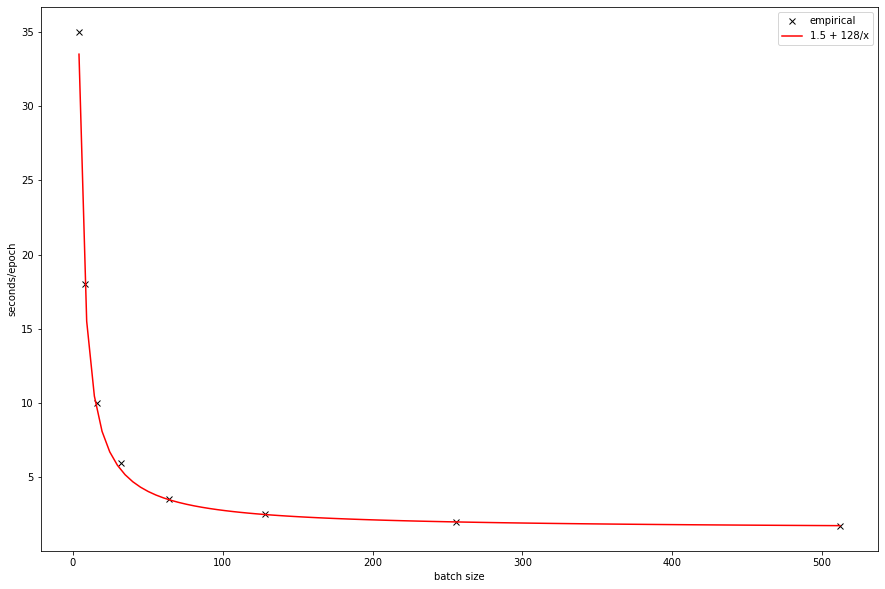

In [52]:
fig, ax = plt.subplots(figsize=(15, 10))
plt.plot(x, y, 'kx', x2, y2, 'r-')
ax.legend(['empirical', '1.5 + 128/x'])
plt.xlabel('batch size')
plt.ylabel('seconds/epoch')